In [1]:
import os
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [2]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only allocate 1GB of memory on the first GPU
  try:
    tf.config.set_logical_device_configuration(
        gpus[0],
        [tf.config.LogicalDeviceConfiguration(memory_limit=2560)])
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


In [3]:
train_datagen=ImageDataGenerator(rescale=1.0/255,rotation_range=40,width_shift_range=.2,height_shift_range=.2,shear_range=.2,zoom_range=.2,horizontal_flip=True,fill_mode='nearest')
test_datagen=ImageDataGenerator(rescale=1.0/255)
train_generator=train_datagen.flow_from_directory("Dataset/Train/",batch_size=256,class_mode='binary',target_size=(64,64))
validation_generator=test_datagen.flow_from_directory('Dataset/Validation/',batch_size=256,class_mode='binary',target_size=(64,64))

Found 160000 images belonging to 2 classes.
Found 22598 images belonging to 2 classes.


In [4]:
from keras.optimizers import Adam
model=tf.keras.models.Sequential([
    #1st conv
    tf.keras.layers.Conv2D(96,(11,11),strides=(4,4),activation='relu',input_shape=(64,64,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,strides=(2,2)),
    #2nd conv
    tf.keras.layers.Conv2D(256,(11,11),strides=(1,1),activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(),
    #3rd conv
    tf.keras.layers.Conv2D(384,(3,3),strides=(1,1),activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(),
    #4th conv
    tf.keras.layers.Conv2D(384,(3,3),strides=(1,1),activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(),
    #5th conv
    tf.keras.layers.Conv2D(256,(3,3),strides=(1,1),activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,strides=(2,2)),
    #To Flatten Layer
    tf.keras.layers.Flatten(),
    #To FC layer 1
    tf.keras.layers.Dense(4096,activation='relu'),
    tf.keras.layers.Dropout(.5),
    #To FC layer 2
    tf.keras.layers.Dense(4096,activation='relu'),
    tf.keras.layers.Dropout(.5),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer=Adam(learning_rate=.001),loss='binary_crossentropy',metrics=['accuracy'])

In [5]:
hist = model.fit(train_generator,
                 validation_data=validation_generator,
                 steps_per_epoch=len(train_generator),  # Set it to the number of batches in one epoch
                 validation_steps=len(validation_generator),  # Set it to the number of batches in one epoch
                 epochs=50)

Epoch 1/50
625/625 [==============================] - 1436s 2s/step - loss: 0.6647 - accuracy: 0.6984 - val_loss: 0.6147 - val_accuracy: 0.6932
Epoch 2/50
625/625 [==============================] - 1176s 2s/step - loss: 0.4281 - accuracy: 0.8040 - val_loss: 0.6055 - val_accuracy: 0.6688
Epoch 3/50
625/625 [==============================] - 1191s 2s/step - loss: 0.3602 - accuracy: 0.8421 - val_loss: 0.3465 - val_accuracy: 0.8632
Epoch 4/50
625/625 [==============================] - 1331s 2s/step - loss: 0.3022 - accuracy: 0.8706 - val_loss: 0.2654 - val_accuracy: 0.8960
Epoch 5/50
625/625 [==============================] - 1373s 2s/step - loss: 0.2729 - accuracy: 0.8851 - val_loss: 0.2400 - val_accuracy: 0.9046
Epoch 6/50
625/625 [==============================] - 1838s 3s/step - loss: 0.2574 - accuracy: 0.8919 - val_loss: 0.3656 - val_accuracy: 0.8626
Epoch 7/50
625/625 [==============================] - 1346s 2s/step - loss: 0.2447 - accuracy: 0.8979 - val_loss: 0.2136 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


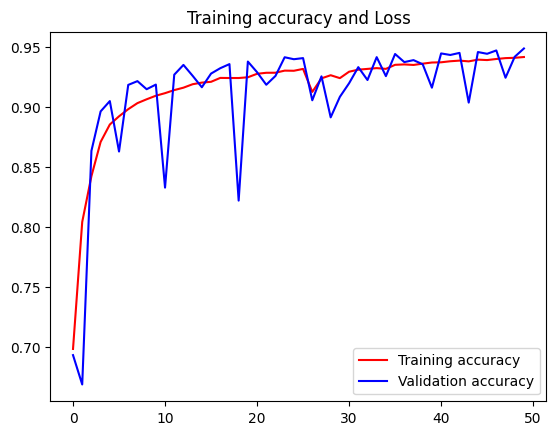

<Figure size 640x480 with 0 Axes>

In [6]:
import matplotlib.pyplot as plt
acc=hist.history['accuracy']
print(hist.history.keys())
val_acc=hist.history['val_accuracy']
loss=hist.history['loss']
val_loss=hist.history['val_loss']

epochs=range(len(acc))

plt.plot(epochs,acc,'r',label='Training accuracy')
plt.plot(epochs,val_acc,'b',label='Validation accuracy')
plt.title('Training accuracy and Loss')
plt.legend(loc=0)
plt.figure()
plt.show()

1/1 [==============================] - 0s 22ms/step
[[1.2295094e-23]]
Is A Woman


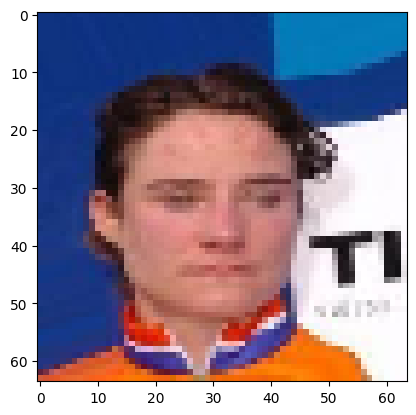

In [20]:
import numpy as np
from keras.preprocessing import image
path="Dataset/Test/Female/160099.jpg"
img=tf.keras.utils.load_img(path,target_size=(64,64))
x=tf.keras.utils.img_to_array(img)
x=np.expand_dims(x,axis=0)

images=np.vstack([x])
classes=model.predict(images,batch_size=1)
print(classes)
if classes[0]>.5:
    print('Is a Man')
else:print('Is A Woman')
plt.imshow(img)

In [23]:
# Assuming 'model' is your trained model
model.save("gender_classifier_model.h5")

1/1 [==============================] - 0s 157ms/step
[[0.]]
Is A Woman


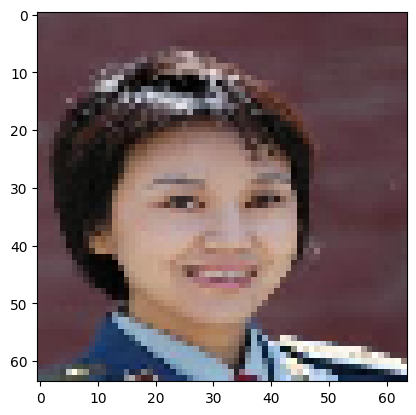

In [32]:
from tensorflow.keras.models import load_model

# Load the model
loaded_model = load_model("gender_classifier_model.h5")
path="Dataset/Test/Female/160564.jpg"
img=tf.keras.utils.load_img(path,target_size=(64,64))
x=tf.keras.utils.img_to_array(img)
x=np.expand_dims(x,axis=0)

images=np.vstack([x])
# Use the loaded model for predictions
loaded_classes = loaded_model.predict(images, batch_size=1)
print(loaded_classes)
if loaded_classes[0] > 0.5:
    print('Is a Man')
else:
    print('Is A Woman')
plt.imshow(img)

In [8]:
from tensorflow.keras.models import load_model
import tensorflow as tf
import gradio as gr
import numpy as np

loaded_model = load_model("gender_classifier_model.h5")


def myfun(img):
    # Gradio automatically converts the input image to a NumPy array
    # Convert the image to the required input format for the model
    img = tf.image.resize(img, (64, 64))
    x = tf.keras.preprocessing.image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    # Use the loaded model for predictions
    loaded_classes = loaded_model.predict(x, batch_size=1)
    print(loaded_classes)
    if loaded_classes[0] > 0.5:
        return 'Is a Man'
    else:
        return 'Is A Woman'


iface = gr.Interface(fn=myfun, inputs=gr.Image(label='Drop an Image or Open Camera to Classify'), outputs=gr.Text())
iface.launch()


Running on local URL:  http://127.0.0.1:7867

To create a public link, set `share=True` in `launch()`.


1/1 [==============================] - 9s 9s/step
[[1.]]
